### Laboratory work 5: Fuzzy Numbers
###### The task of the lab is to develop the fuzzy operations:

######    Division in the method truediv
######    Summation in the method __add

In [1]:
import numpy as np
import matplotlib.pyplot as plt

![title](1.png)

In [6]:
class FuzzyValue():
    def __init__(self,val,width):
        self.val = float(val)
        self.width = float(width)
        print(float(val), ", ", float(width))

    def __call__(self,x):
        buff = ((x-self.val)/self.width)*((x-self.val)/self.width)
        return max(0,1-buff)  

    def __truediv__(self, o):
        x1 = self.val + self.width
        x2 = self.val - self.width
        y1 = np.power((o.val + o.width), -1) # 1/o.val
        y2 = np.power((o.val - o.width), -1) # 1/o.width
#       Division = A/B

        Division_max=max(x1*y1, x1*y2, x2*y1, x2*y2)
        Division_min=min(x1*y1, x1*y2, x2*y1, x2*y2)
        
        return_max=(Division_max - Division_min)/2 + Division_min
        return_min=(Division_max - Division_min)/2
        print('Maximum __truediv__: ', return_max, '\n')
        print('Minimum __truediv__: ', return_min, '\n')
        return return_max, return_min

    def __add__(self, o): 
        x1 = self.val
        x2 = self.width
        y1 = o.val
        y2 = o.width
#       Addition=A+B

        Addition_max=x1+x2+y1+y2
        Addition_min=x1+y1-x2-y2
        
        return_max=(Addition_max - Addition_min)/2 + Addition_min
        return_min=(Addition_max - Addition_min)/2
        print('Maximum __add__: ', return_max, '\n')
        print('Minimum __add__: ', return_min, '\n')
        return return_max, return_min

a = FuzzyValue(5.1,1.5)
b = FuzzyValue(4.3,2)
print(a+b)
print(a/b)

5.1 ,  1.5
4.3 ,  2.0
Maximum __add__:  9.399999999999999 

Minimum __add__:  3.5 

(9.399999999999999, 3.5)
Maximum __truediv__:  1.720496894409938 

Minimum __truediv__:  1.1490683229813667 

(1.720496894409938, 1.1490683229813667)


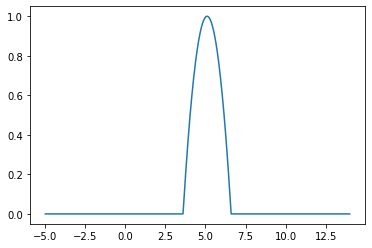

In [22]:
xs = np.linspace(-5,14,num=1000)
# a = FuzzyValue(0,3)
y = [a(x) for x in xs]
plt.plot(xs,y)

Maximum __truediv__:  1.720496894409938 

Minimum __truediv__:  1.1490683229813667 

1.720496894409938 ,  1.1490683229813667


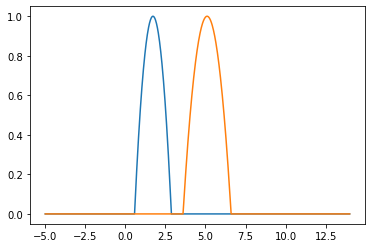

In [23]:
division = a/b
division_val = FuzzyValue(division[0],division[1])
division_plt = [division_val(x) for x in xs]
plt.plot(xs,division_plt)
plt.plot(xs,y)

Maximum __add__:  9.399999999999999 

Minimum __add__:  3.5 

9.399999999999999 ,  3.5


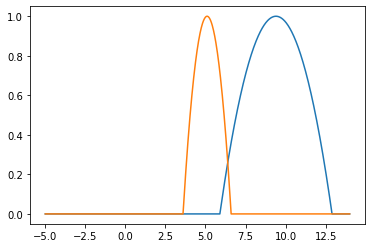

In [24]:
add = a+b
add_val = FuzzyValue(add[0],add[1])
add_plt = [add_val(x) for x in xs]
plt.plot(xs,add_plt)
plt.plot(xs,y)